# Biodiversity

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

In [3]:
connection = sqlite3.connect("observations.db" "species_info.db")
cursor = connection.cursor()
observations.to_sql("observations", connection, if_exists='replace')
species_info.to_sql("species_info", connection, if_exists='replace')

Total observations for each National Park.

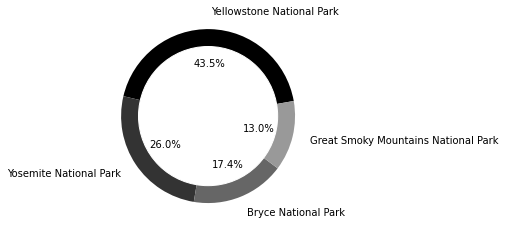

In [4]:
sum_obs_per_park = cursor.execute("""SELECT park_name, SUM(observations)
FROM observations
GROUP BY 1
ORDER BY 2 DESC;""")

labels,values = zip(*sum_obs_per_park)
colors = ("#000000", "#333333", "#666666", "#999999")
my_circle = plt.Circle((0, 0), 0.8, color='white')

plt.pie (values, labels=labels, colors = colors, autopct='%1.1f%%', startangle=10, labeldistance=1.2)

plt.gca().add_artist(my_circle)
plt.show()

Here is the total number of species each National Park has.

In [5]:
cursor.execute("""SELECT park_name, COUNT(DISTINCT scientific_name)
FROM observations
GROUP BY 1
HAVING 2;""").fetchall()

[('Bryce National Park', 5541),
 ('Great Smoky Mountains National Park', 5541),
 ('Yellowstone National Park', 5541),
 ('Yosemite National Park', 5541)]

Total observations by species (first 15) for each park separately. 

With two bar charts for better understanding.

First bar chart


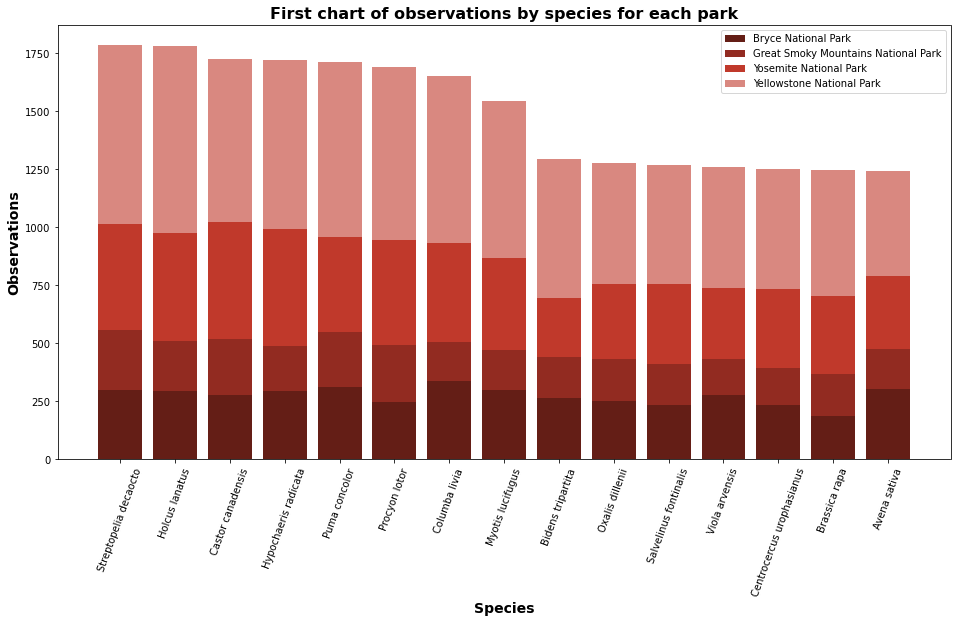

Second bar chart


<Figure size 432x288 with 0 Axes>

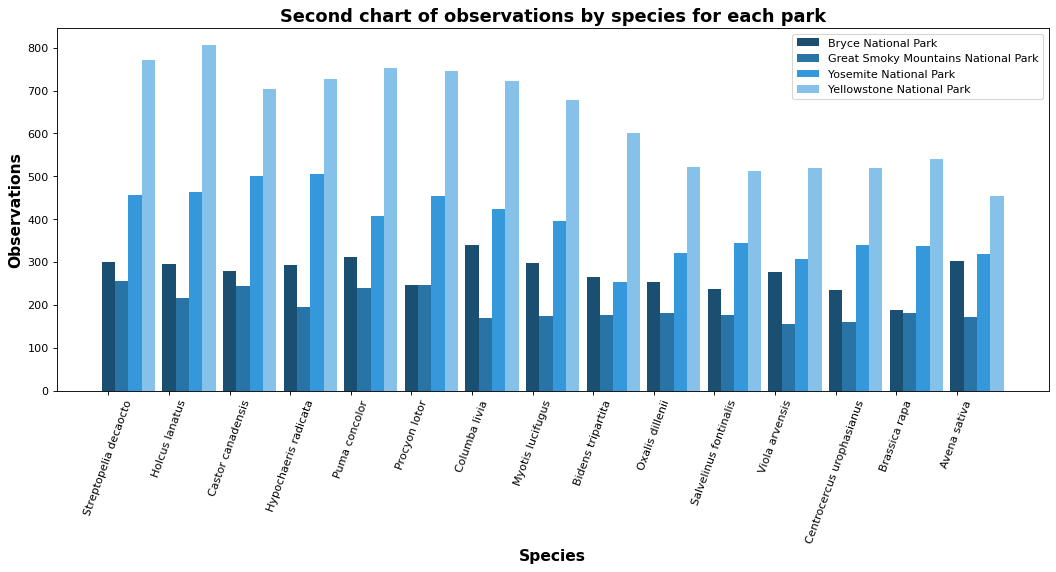

In [6]:
first_15 = cursor.execute("""SELECT scientific_name, 
SUM (CASE 
WHEN park_name = "Bryce National Park" THEN observations
END) AS YNP,
SUM (CASE 
WHEN park_name = "Great Smoky Mountains National Park" THEN observations
END) AS YNP,
SUM (CASE 
WHEN park_name = "Yosemite National Park" THEN observations
END) AS YNP,
SUM (CASE 
WHEN park_name = "Yellowstone National Park" THEN observations
END) AS BNP
FROM observations
GROUP BY 1
ORDER BY SUM(observations) DESC
LIMIT 15;""")

###-------------------- first--------
print("First bar chart")

x1,y1,k1,z1,w1 = zip(*first_15)

c_bottom = np.add(y1,k1)
d_bottom = np.add(c_bottom,z1)


plt.figure(figsize=(16,8))
plt.bar(x1,y1, color='#641E16', label="Bryce National Park")
plt.bar(x1,k1, bottom = y1, color='#922B21', label="Great Smoky Mountains National Park")
plt.bar(x1,z1, bottom = c_bottom, color='#C0392B', label="Yosemite National Park")
plt.bar(x1,w1, bottom = d_bottom, color='#D98880', label="Yellowstone National Park")

plt.title("First chart of observations by species for each park", fontweight='bold', fontsize=16)
plt.xlabel("Species", fontweight='bold', fontsize=14)
plt.ylabel("Observations", fontweight='bold', fontsize=14)
plt.xticks(rotation=70)

plt.legend()
plt.show()

plt.clf()

###----------------------second-------
print("Second bar chart")

barWidth = 0.22

r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

fig, ax = plt.subplots(1,1,figsize=(16,6), dpi= 80)
plt.bar(r1, y1, color='#1B4F72', width=barWidth, label="Bryce National Park")
plt.bar(r2, k1, color='#2874A6', width=barWidth, label="Great Smoky Mountains National Park")
plt.bar(r3, z1, color='#3498DB', width=barWidth, label="Yosemite National Park")
plt.bar(r4, w1, color='#85C1E9', width=barWidth, label="Yellowstone National Park")

plt.title("Second chart of observations by species for each park", fontweight='bold', fontsize=16)
plt.xlabel("Species", fontweight='bold', fontsize=14)
plt.ylabel("Observations", fontweight='bold', fontsize=14)

ax.set_xticks(range(len(x1)))
ax.set_xticklabels(x1, rotation = 70)

plt.legend()
plt.show()

Next bar chart give us the total number for the type of spices.

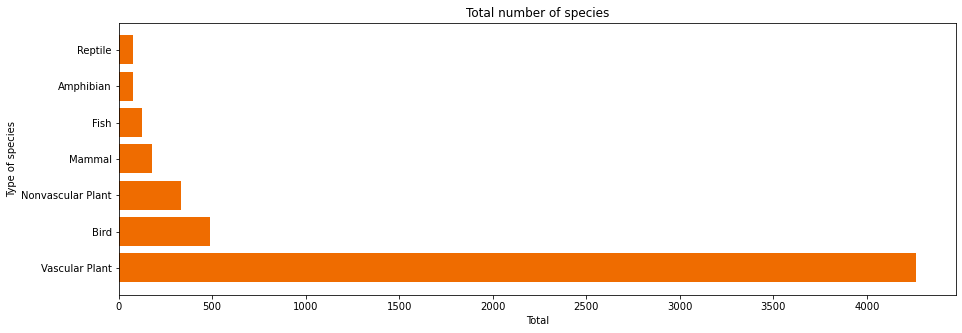

In [7]:
type_of_species = cursor.execute("""SELECT species_info.category, COUNT (DISTINCT species_info.scientific_name)
FROM species_info
JOIN observations
ON species_info.scientific_name = observations.scientific_name
GROUP BY 1
ORDER BY 2 DESC;""")

plt.figure(figsize = (15, 5))
plt.barh(*zip(*type_of_species), color="#ef6c00")

plt.ylabel("Type of species")
plt.xlabel("Total")
plt.title("Total number of species")

plt.show()